### Data

In [48]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv("..\Marketing\ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

* Rename columns Income
* Đổi kiểu dữ liệu của Income sang float

In [50]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].astype(str).str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype(float)

In [51]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2nCycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


# Section 01: Exploratory Data Analysis

* Có giá trị null hoặc outliers không? Cách xử lý chúng?
* Có biến nào đòi hỏi các biến đổi không?
* Có biến hữu ích nào có thể tạo ra từ dữ liệu đã cho (vd: profit = sale-cost)?



In [52]:
# missing values
df.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2nCycle       0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

* Income có 24 missing values

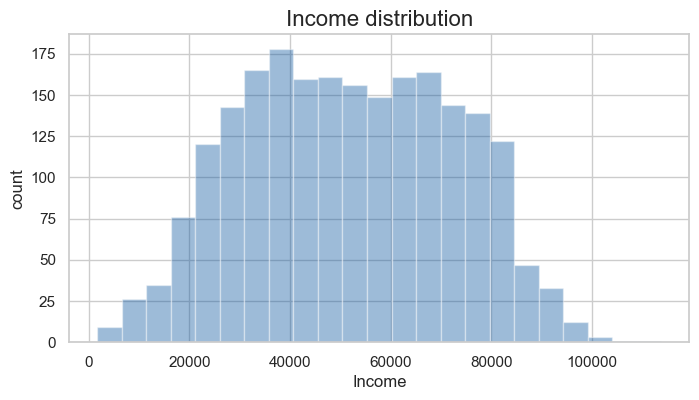

In [41]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

* Income có range từ 0 đến 100k và đổ phổ biến của income ở khoảng giữa (tầm 40k-70k) nên ta sẽ chọn median làm giá trị imputing

In [42]:
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Outliers



In [55]:
df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(33,33), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

ValueError: Layout of 4x4 must be larger than required size 32

<Figure size 3200x3200 with 0 Axes>

* Bỏ `Year_Birth <= 1900`:

In [ ]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

## Đổi kiểu dữ liệu


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

* Đổi kiểu dữ liệu của `Dt_Customer` sang datetime:

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

KeyError: 'Dt_Customer'

In [9]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2nCycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [13]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Mnt
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' là latest campaign

df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1) 
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

KeyError: 'Dt_Customer'

### EDA



<Axes: >

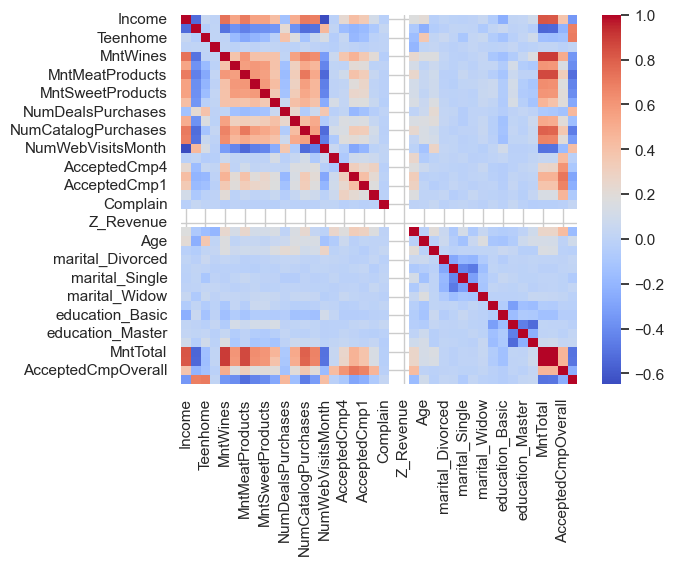

In [14]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

* Biểu đồ thể hiện tác động của Income lên spend:

In [15]:
sns.lmplot(x='Income', y='TotalMnt', data=df)

KeyError: "['TotalMnt'] not in index"

* Vì plot có chứa outliers nên ta sẽ limit nó lại Income < 200000

In [16]:
sns.lmplot(x='Income', y = 'TotalMnt', data = df[df['Income']<200000])

KeyError: "['TotalMnt'] not in index"

*Income có mối quan hệ thuận với TotalMnt => khi khách hàng mua càng nhiều thì chứng tỏ họ có Income lớn

In [17]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

ValueError: Could not interpret input 'TotalMnt'

<Figure size 400x400 with 0 Axes>

* Biểu đồ thể hiện range của từng dependents đối với TotalMnt:
* Khi khách hàng không có con thì họ sẽ chi nhiều tiền hơn cho việc mua sắm

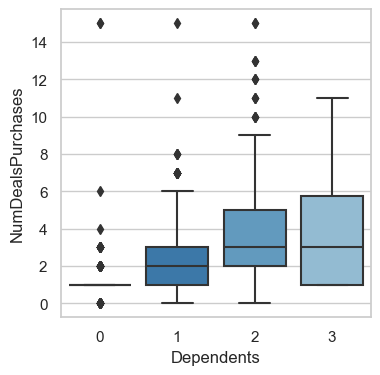

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

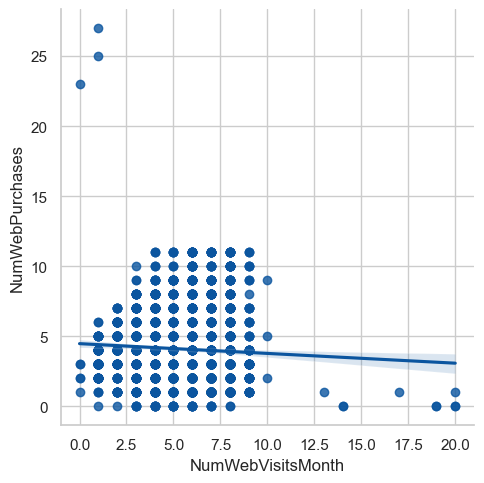

In [19]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

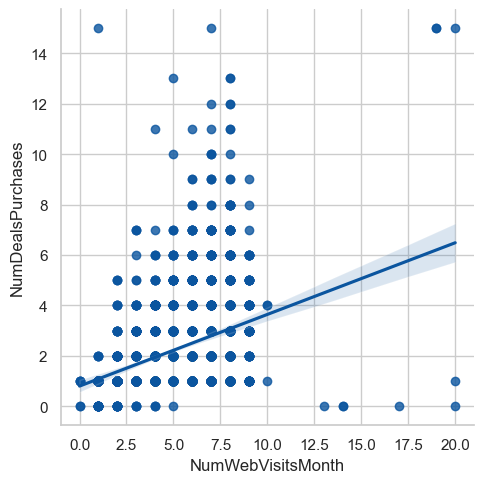

In [20]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

* Số lượt truy cập trang web trong tháng trước không có mối tương quan tích cực với số lần mua hàng trên web.
* Thay vào đó, nó có mối tương quan tích cực với số lượng giao dịch được mua, cho thấy rằng các giao dịch đặc biệt là một cách hiệu quả để kích thích mua sắm trên trang web.

# Section 02: Statistical Analysis
* Những yếu tố nào có mối quan hệ đáng kể với số lần mua hàng tại cửa hàng?
* Ở Hoa Kỳ tổng số lần mua hàng cao hơn các nước còn lại không?
* Giả định: những người mua vàng thường thì bảo thủ hơn. Do đó, những người đã chi trên mức trung bình cho vàng trong 2 năm qua sẽ có nhiều lần mua hàng tại cửa hàng hơn. Hãy chứng minh hoặc bác bỏ câu lời tuyên bố này bằng cách sử dụng một kiểm định thống kê thích hợp.
* Cá có chứa axit béo Omega 3 tốt cho não. Vì vậy, liệu "Những người đã kết hôn và đang theo học tiến sĩ" có mối quan hệ đáng kể với số tiền đã chi cho cá không? Những yếu tố nào khác có mối quan hệ đáng kể với số tiền đã chi cho cá? 

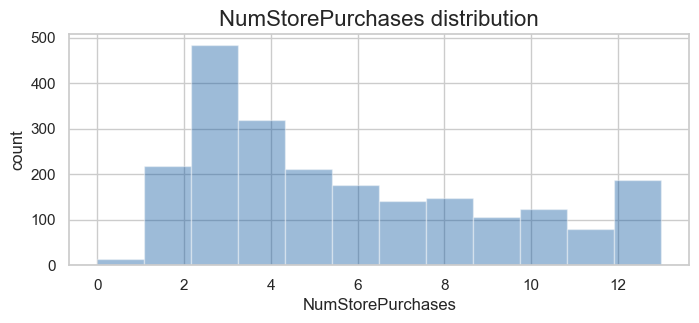

In [21]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

### Đâu là các biến (thuộc tính) ảnh hưởng đén việc mua hàng ở store ?  

* Ta sẽ dùng một mô hình hồi quy với NumStorePurchases là biến target để dự báo số lượng mua hàng ở store và lấy được tương quan của từng features đối với biến target này


* Bỏ cột ID không cần thiết vì nó không có tác dụng trong mô hình máy học, và encoding các categorical features

In [22]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

KeyError: "['ID', 'Dt_Customer'] not found in axis"

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat = df.select_dtypes(exclude=np.number)

enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names_out(cat.columns)

num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2nCycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("MSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median: ", y.median())

MSE:  2.062885090824382
Median:  5.0



* Chia tập train, test theo tỉ lệ 7:3 và tiến hành dự báo. => cho ra score (MSE), MSE thấp hơn so với median nên ta có thể cho rằng mô hình này đang hoạt động tốt trên bộ dữ liệu

* Giờ chúng ta sẽ tìm ra các features có ảnh hưởng đến store purchase

In [25]:
!pip install shap
!pip install eli5

   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
    --------------------------------------- 10.2/453.1 kB ? eta -:--:--
   ------------- -------------------------- 153.6/453.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     ------------------------- ------------ 143.4/216.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107761 sha256=de8c1687df83ba11e3f84060db23463c31b2b593ca03087d672c4

In [26]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1)
feature_importances = result.importances_mean
feature_names = X_test.columns.tolist()
importances = [(importance, feature) for importance, feature in zip(feature_importances, feature_names)]
importances.sort(reverse=True)
for importance, feature in importances:
    print(f"{feature}: {importance}")

MntTotal: 0.18571362665150593
Income: 0.16405804440206787
NumWebVisitsMonth: 0.07874690455536473
NumDealsPurchases: 0.06149453396213933
MntMeatProducts: 0.054624037887814544
MntRegularProds: 0.02649728203299149
NumWebPurchases: 0.021539932293843666
Dependents: 0.017113566309999894
Response: 0.015515691489899331
Customer_Days: 0.010022906573567669
Kidhome: 0.008121090260369668
NumCatalogPurchases: 0.007429626504071718
AcceptedCmp2: 0.005247546483985699
Age: 0.004802526052415712
MntWines: 0.0036563127990770993
AcceptedCmp5: 0.003099563581549336
Recency: 0.0025554280476044245
AcceptedCmp4: 0.0017113988756813137
AcceptedCmp3: 0.001011793700062924
MntFruits: 0.0006842335048846349
MntGoldProds: 0.00047720065300784766
marital_Together: 0.0002934410309927471
education_2nCycle: 0.0002755238376582536
MntFishProducts: 0.00014584974348376135
education_Basic: 0.00013524979398628069
marital_Married: 0.00012209226901575
Z_Revenue: 0.0
Z_CostContact: 0.0
marital_Single: -5.869183693341107e-06
educatio

* Có 4 features ảnh hưởng đến store purchases: 
  - TotalPurchases: 11.870707518645506
  - NumCatalogPurchases: 1.97760935295303
  - NumWebPurchases: 1.5717476315258967
  - NumDealsPurchases: 0.7977262648659605
    
  

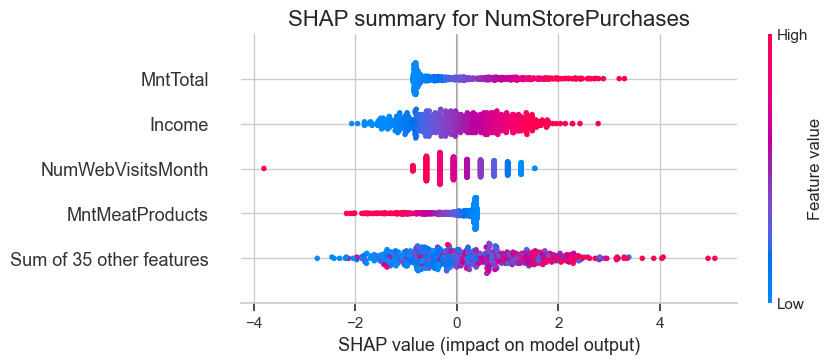

In [28]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

- Số lượng mua hàng tại cửa hàng tăng khi tổng số lần mua hàng ('TotalPurchases') tăng.

- Số lượng mua hàng tại cửa hàng giảm khi số lượng mua hàng qua các kênh catalog, trang web hoặc các ưu đãi ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases') tăng: Điều này cho thấy khi khách hàng tham gia mua hàng qua các kênh catalog, trang web hoặc các ưu đãi, khả năng mua hàng tại cửa hàng trực tiếp của họ giảm đi.

- Những xu hướng này cho thấy các mẫu hành vi của khách hàng. Khách hàng có tổng số lần mua hàng cao hơn có khả năng ưa thích mua hàng tại cửa hàng, trong khi những người tham gia nhiều hơn trong việc mua hàng qua các kênh khác như catalog, trang web hoặc các ưu đãi lại có xu hướng giảm sự ưa thích mua hàng tại cửa hàng trực tiếp.

### Ở Hoa Kỳ tổng số lần mua hàng cao hơn các nước còn lại không ?


In [29]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

KeyError: 'Country'

<Figure size 500x400 with 0 Axes>

In [30]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

KeyError: 'Country'

<Figure size 500x400 with 0 Axes>

* Về cả số lượng mua hàng lẫn số lượng tiền bỏ ra, thì Spain là nước cao nhất còn Mỹ chỉ xếp thứ 2 từ dưới lên

###Giả định: những người mua vàng thường thì bảo thủ hơn. Do đó, những người đã chi trên mức trung bình cho vàng trong 2 năm qua sẽ có nhiều lần mua hàng tại cửa hàng hơn. Hãy chứng minh hoặc bác bỏ câu lời tuyên bố này bằng cách sử dụng một kiểm định thống kê thích hợp.


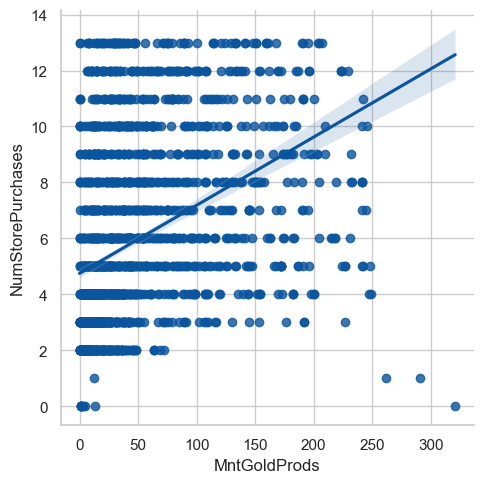

In [31]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

In [32]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.38969697020088534
Kendall p-value:  1.0607665930974266e-147


* Có mối tương quan tốt giữa việc mua vàng với việc mua hàng tại store

### Cá có chứa axit béo Omega 3 tốt cho não. liệu "những người đã kết hôn và đang theo học tiến sĩ" có mối quan hệ đáng kể với số tiền đã chi cho cá không?


In [33]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

KeyError: 'Marital_Status_Married'

In [34]:
# t-test p-value
from scipy.stats import ttest_ind
print('alpha', 0.05)
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

alpha 0.05


KeyError: 'Married_PhD'

* Bác bỏ H0 => không có sự khác biệt giữa người đã kết hôn và theo học tiến sĩ với những người khác trong việc tiêu thụ cá

# Section 03: Data Visualization
* Chiến dịch marketing nào là thành công nhất?
* Khách hàng trung bình của công ty này trông như thế nào?
* Sản phẩm nào đang hoạt động tốt nhất?
* Kênh nào đang hoạt động kém?


### Chiến dịch nào là thành công nhất?


Text(0, 0.5, 'Campaign')

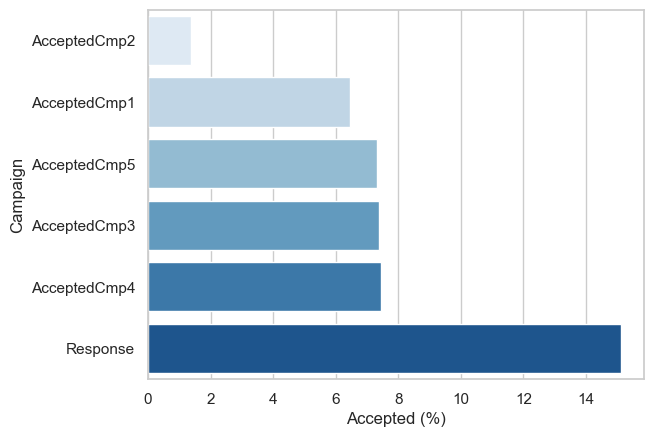

In [35]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')


In [36]:
cam_success

,index,Percent
0,AcceptedCmp1,6.439909
1,AcceptedCmp2,1.360544
2,AcceptedCmp3,7.392290
3,AcceptedCmp4,7.437642
4,AcceptedCmp5,7.301587
5,Response,15.102041


### trung bình khách hàng của công ty này ra sao?

In [37]:
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

mnt_cols = [col for col in df.columns if 'Mnt' in col]

channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [38]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2nCycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Dependents'],
      dtype='object')

In [39]:
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

KeyError: "['TotalPurchases', 'TotalCampaignsAcc'] not found in axis"

### Sản phầm nào được ưa chuộng nhât?



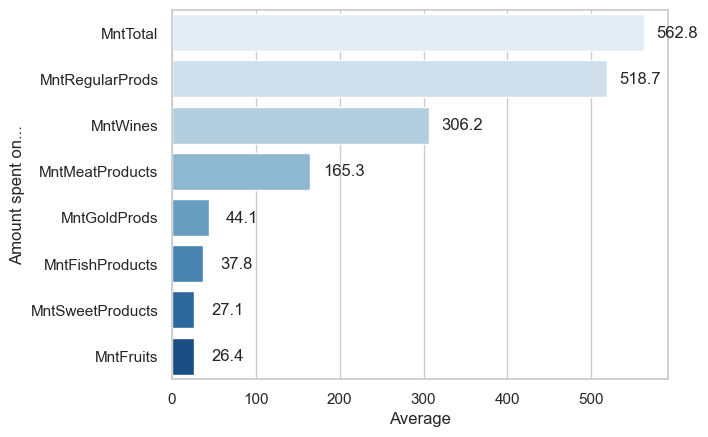

In [40]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average', ascending = False).reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

* Wines đang là sản phẩm được ưa chuộng nhất

### Kênh bán hàng nào đang hoạt động không tốt?



In [41]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average', ascending = False).reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

KeyError: "['TotalPurchases', 'TotalCampaignsAcc'] not in index"

* Các chanels phát triển chậm như campaign, deals và catalog